# Getting Started in Machine Learning
### Chapter 9: Regression Trees
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Single feature data - solar flux for 30 days

In [2]:
rawdata=pd.read_csv("solar-data-july-2015.txt",sep="\t",skiprows=15)
Y=(np.flip(np.array(rawdata["Flux"]))).reshape(-1,1)
n=len(Y)
X=np.array(list(range(n))).reshape(-1,1)

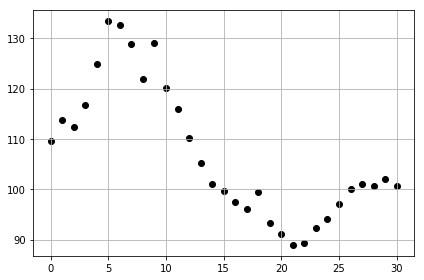

In [3]:
plt.scatter(X,Y,c="k");
plt.grid()
fig=plt.gcf()
fig.tight_layout()
#fig.savefig("solar-flux-july-2015.pdf")

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
regr=[DecisionTreeRegressor(max_depth=j) for j in range(2,7)]
for j in range(2,7):
    regr[j-2].fit(X,Y)
YP=[regr[j-2].predict(X) for j in range(2,7)]

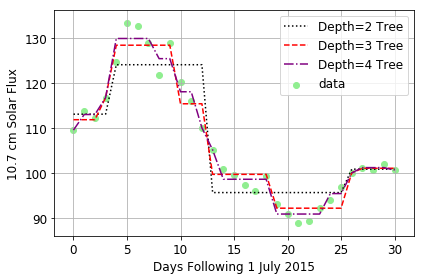

In [6]:
plt.plot(X,YP[2-2],c="k",ls=":", label="Depth=2 Tree")
plt.plot(X,YP[3-2],c="red",ls="--", label="Depth=3 Tree")
plt.plot(X,YP[4-2],c="purple",ls="-.", label="Depth=4 Tree")
plt.scatter(X,Y,label="data",color="lightgreen")

plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

plt.ylabel("10.7 cm Solar Flux", fontsize=12)
plt.xlabel("Days Following 1 July 2015", fontsize=12)
fig=plt.gcf()
fig.tight_layout()
#fig.savefig("regr-tree-solar-flux-july-2015.pdf")

In [7]:
from sklearn.metrics import mean_squared_error   

In [8]:
for j in range(2,8):
    reg=DecisionTreeRegressor(max_depth=j)
    reg.fit(X,Y)
    YP=reg.predict(X)
    MSE=mean_squared_error(YP,Y)
    print("The MSE for a depth of ",j," is ", round(MSE,2))


The MSE for a depth of  2  is  25.71
The MSE for a depth of  3  is  8.32
The MSE for a depth of  4  is  3.73
The MSE for a depth of  5  is  0.81
The MSE for a depth of  6  is  0.11
The MSE for a depth of  7  is  0.0


## Auto MPG Data

In [9]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)

In [10]:
data[:5]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [11]:
X=np.array(data[["displ","hp"]])
Y=np.array(data["mpg"]).reshape(-1,1)
n=len(Y)

In [12]:
r=DecisionTreeRegressor(max_depth=3)
r.fit(X,Y)
YP=r.predict(X)

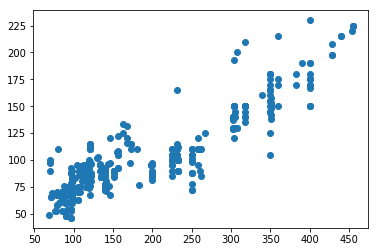

In [13]:
DISP=X[:,0]
HP=X[:,1]
plt.scatter(DISP,HP)

In [14]:
values=list(set(YP))
nval=len(values)
print(nval,"distinct predictions among ", len(YP)," total predictions")

8 distinct predictions among  392  total predictions


In [15]:
def cluster_center(value, X, Y, Z):
    x,y=np.array([[x,y] for (x,y,z) in zip (X,Y,Z) if z==value]).T
    x=np.mean(x)
    y=np.mean(y)
    return (x,y)
cluster_centers = [cluster_center(u, DISP, HP, YP) for u in values]

In [16]:
print(" HP    DISP    MPG")
for (hp,disp),mpg in zip(cluster_centers, values):
    print("%6.2f %6.2f %5.2f" %(hp,disp,mpg))

 HP    DISP    MPG
 84.93  62.69 34.80
380.57 186.93 13.41
325.55 144.61 15.31
232.44  98.26 19.06
299.17 111.67 23.72
129.33  97.23 24.66
114.54  77.25 28.95
101.81  63.88 31.71


Decision surface code example is given at https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

In [17]:
# MSE is based on entire data set, we did not do a train/test split
# so interpret it carefully
print("MSE=",mean_squared_error(YP,Y))

MSE= 13.614818174260236


In [18]:
ymin, ymax = HP.min() - 1, HP.max() + 1
xmin, xmax = DISP.min() - 1, DISP.max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 1),
                         np.arange(ymin, ymax, 1))

In [19]:
ZP=r.predict(np.c_[xx.ravel(), yy.ravel()])
Z=ZP.reshape(xx.shape)

In [20]:
#
# find the coordinates of the center of each plateau
# and its corresponding Z-value
#
# this code only works because each value falls in a SINGLE rectangle
# if the same value occurs in multiple subdomain unexpected results will be returned.
#
def find_plateau_centers(Z,xmin,xmax,ymin,ymax):
    U=np.unique(Z)
    centers=[]
    for x in U:
        locs=[]
        for ix in np.arange(xmin,xmax,1):
            for iy in np.arange(ymin,ymax,1):
                zval=Z[int(iy-ymin)][int(ix-xmin)]
                if zval==x:
                    locs.append((ix,iy))
        center=list(np.mean(locs,axis=0))
        centers.append((x,center))
    return(centers)

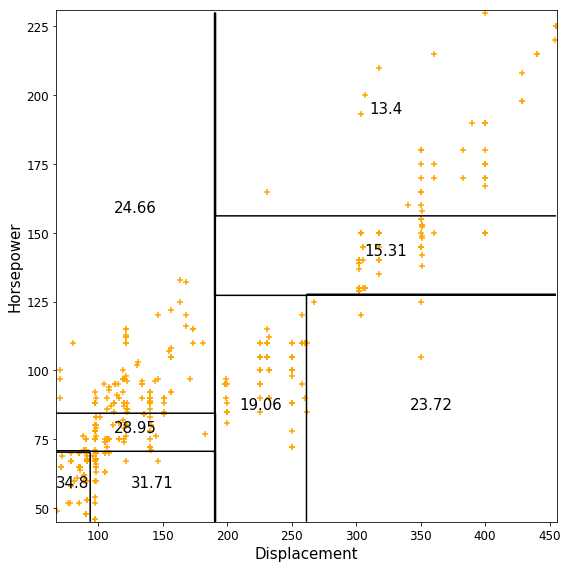

In [21]:
cs = plt.contour(xx, yy, Z, colors="k")#,  cmap=plt.cm.RdYlBu)

plt.xlabel("Displacement",fontsize=15)
plt.ylabel("Horsepower",fontsize=15)

centers = find_plateau_centers(Z,xmin,xmax,ymin,ymax)
for value, location in centers:
    plt.text(*location, str(round(value,2)), fontsize=15, 
             horizontalalignment="center")

plt.scatter(DISP,HP,marker="+",c="orange")
plt.xlim(xmin,xmax);
plt.ylim(ymin,ymax)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.tight_layout()
#fig.savefig("Regression-Tree-Surface-Plot-MPG.pdf")

# higher dimensions


In [22]:
X=np.array(data[["cyl","displ","hp","weight", "accel"]])
#X=np.array(data[["displ","hp"]])
Y=np.array(data["mpg"]).reshape(-1,1)
n=len(Y)
print(n)

392


In [23]:
r=DecisionTreeRegressor(max_depth=3)
r.fit(X,Y)
YP=r.predict(X)

In [24]:
print("MSE=",mean_squared_error(Y,YP))

MSE= 13.381295810068709


In [25]:
values=list(set(YP))
nval=len(values)
print(nval,"distinct values among ", len(YP)," predictions")

8 distinct values among  392  predictions
